In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import datetime

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

import os
import math

import dask
from dask.distributed import Client
from dask import delayed

import locale 

In [3]:
locale.setlocale(locale.LC_TIME, "es_ES");

# Funciones

In [ ]:
def FiguraSerieTemporal(sst,Ylabel,Xlabel,TituloFigura,FileOut,Ymin,Ymax):
## Serie temporal anotada con valores maximos y minimos
    dTText = .12

sst,Ylabel,Xlabel,TituloFigura,FileOut,Ymin,Ymax


sst_rolling = sst.rolling(time = 360 , center = True).mean()

tmax = sst.isel(sst.argmax(...))
tmin = sst.isel(sst.argmin(...))

d_tmax = sst.time.isel(sst.argmax(...))
d_tmin = sst.time.isel(sst.argmin(...))

#Linear fit
ind = np.isfinite(sst)
z = np.polyfit(sst.time.astype(np.int64)[ind],sst[ind], 1)
Dlinearf = z[0] * sst.time.astype(np.int64) + z[1]
Dslope=z[0]/1.e-9*24*3600*365*100 #paso a C por siglo
tTendencia =  "\n %2.2f $^\circ$C "%(sst[-1]-sst[0]) + ' desde el ' + sst.time[0].dt.strftime("%d %B %Y").values + " (Tendencia: " + "%2.2f"%(Dslope) + " $^\circ$C/siglo )"

fig, ax = plt.subplots(1 , 1 , figsize = (14,8))
ax.plot(sst.time , sst,'c' , label = 'Diario')
ax.plot(sst_rolling.time , sst_rolling,'b', label='Suavizado (1 año)' , linewidth = '3')
ax.plot(sst.time,Dlinearf,'b:',linewidth=2,label = 'Tendencia');

ax.plot(d_tmax , tmax,'rs' , markersize = 12 , markeredgecolor='k')
ax.plot(d_tmin , tmin,'bs' , markersize = 12 , markeredgecolor='k')

ax.legend(loc = 4)

tTActual = sst.time[-1].dt.strftime("%d %B %Y").values + " %2.2f $^\circ$C "%(sst[-1].values)
tTMaxima =  'Temperatura máxima: ' + "%2.2f ºC"%(tmax) + ' el ' + d_tmax.dt.strftime("%d %B %Y").values
tTMinima =  'Temperatura mínima: ' + "%2.2f ºC"%(tmin) + ' el ' + d_tmin.dt.strftime("%d %B %Y").values
tPeriodo =  " [" + sstd.time[0].dt.strftime("%d %B %Y").values + " - "+ sstd.time[-1].dt.strftime("%d %B %Y").values + "]"

ax.set_title(TituloFigura + tPeriodo + '\n' + tTMaxima + ' - ' + tTMinima + tTendencia);
ax.text(sst.time[0] , math.floor(ax.get_ylim()[1]*10)/10 , tTActual, va = 'center',
            bbox={'facecolor':'white', 'edgecolor':'none', 'pad':10},size=14)

ax.grid(linestyle='-', linewidth=.9)
ax.set_ylabel(Ylabel)
ax.set_xlabel(Xlabel)
ax.set_frame_on(False)
plt.savefig(FileOut)

In [4]:
Ylabel  = 'Temperatura [($^\circ$C)]'
Xlabel  = 'Fecha'

# Inicio

In [5]:
HOME=os.environ['HOME']   
f = open(HOME+'/.env', 'r')
for line in f.readlines():
    Name=line.strip().split('=')[0]
    Content=line.strip().split('=')[-1]
    if Name=='dirData' or Name=='dirAnalisis':
        exec(Name + "=" + "'" + Content + "'")
f.close()

In [6]:
if os.uname().nodename.lower().find('eemmmbp') != -1:
    imagesDir = dirAnalisis + '/SSTGlobalAnalysis/images'
    dataDir   = dirAnalisis + '/SSTGlobalAnalysis/data'    
elif os.uname().nodename.lower().find('sagams') != -1:
    imagesDir = dirAnalisis + '/SSTGlobalAnalysis/images'
    dataDir   = dirAnalisis + '/SSTGlobalAnalysis/data'
elif os.uname().nodename.lower().find('rossby') != -1:
    imagesDir = dirAnalisis + '/SSTGlobalAnalysis/images'
    dataDir   = dirAnalisis + '/SSTGlobalAnalysis/data'

In [10]:
Titulos = ['Oceano Global','Hemisferio norte','Hemisferio sur','AtlanticoNorte', 'Demarcación marina levantino-balear', 'Demarcación marina noratlántica','Demarcación marina canaria','Demarcación sudatlántica','Demarcación Estrecho y Alborán','Iberian Canary Basin']
Titulos_short = ['GO','NH','SH','NAtl','LEB', 'NOR','CAN','SUD','ESA','IBICan']

## Reading data

In [11]:
it=9

In [12]:
titulo = Titulos[it]
titulo_short = Titulos_short[it]

In [22]:
# Daily data
datad = xr.open_dataset(dataDir+'/sstd_mean_'+titulo_short+'.nc')
sstd = datad.sst
datad_anom = xr.open_dataset(dataDir+'/sstd_anom_mean_'+titulo_short+'.nc')
sstd_anom = datad_anom.sst

In [23]:
# Monthly data
datam = xr.open_dataset(dataDir+'/sstm_mean_'+titulo_short+'.nc')
sstm = datam.sst
datam_anom = xr.open_dataset(dataDir+'/sstm_anom_mean_'+titulo_short+'.nc')
sstm_anom = datam_anom.sst

## Times series mean Sea Surface Temperature

In [14]:
Title1  = 'Temperatura superficial promedio en el '+ titulo
File1 = imagesDir + '/sstd_mean_'+titulo_short+'.png'


## Times series mean Sea Surface Temperature anomaly 

In [ ]:
FiguraSerieTemporal(sstd,Ylabel,Xlabel,Title1,File1,17.5,19)

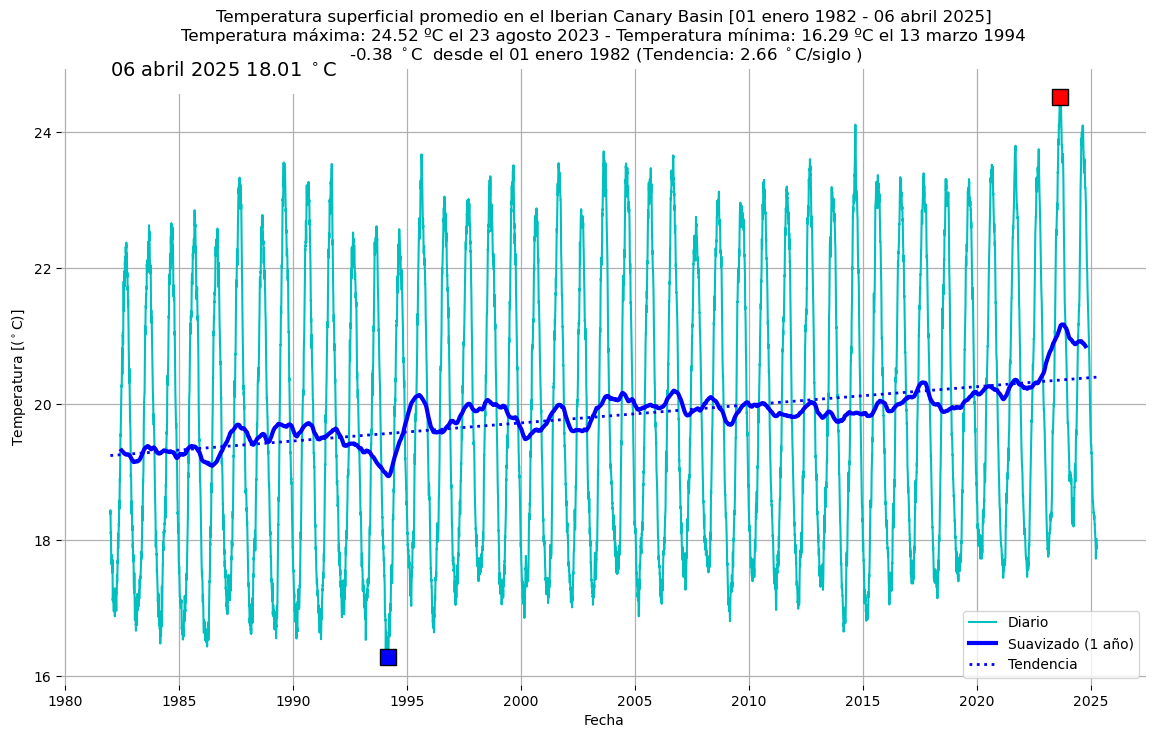

In [ ]:

sst=sstd
TituloFigura=Title1
FileOut=File1
Ymin=17.5
Ymax=19

sst_fil = sst.rolling(time = 360 , center = True).mean()

tmax = sst.isel(sst.argmax(...))
tmin = sst.isel(sst.argmin(...))

d_tmax = sst.time.isel(sst.argmax(...))
d_tmin = sst.time.isel(sst.argmin(...))

#Linear fit
ind = np.isfinite(sst)
z = np.polyfit(sst.time.astype(np.int64)[ind],sst[ind], 1)
sst_linearf = z[0] * sst.time.astype(np.int64) + z[1]
Dslope=z[0]/1.e-9*24*3600*365*100 #paso a C por siglo
tTendencia =  "\n %2.2f $^\circ$C "%(sst[-1]-sst[0]) + ' desde el ' + sst.time[0].dt.strftime("%d %B %Y").values + " (Tendencia: " + "%2.2f"%(Dslope) + " $^\circ$C/siglo )"

fig, ax = plt.subplots(1 , 1 , figsize = (14,8))
ax.plot(sst.time , sst,'c' , label = 'Diario')
ax.plot(sst_fil.time , sst_fil,'b', label='Suavizado (1 año)' , linewidth = '3')
ax.plot(sst.time,sst_linearf,'b:',linewidth=2,label = 'Tendencia');

ax.plot(d_tmax , tmax,'rs' , markersize = 12 , markeredgecolor='k')
ax.plot(d_tmin , tmin,'bs' , markersize = 12 , markeredgecolor='k')

ax.legend(loc = 4)

tTActual = sst.time[-1].dt.strftime("%d %B %Y").values + " %2.2f $^\circ$C "%(sst[-1].values)
tTMaxima =  'Temperatura máxima: ' + "%2.2f ºC"%(tmax) + ' el ' + d_tmax.dt.strftime("%d %B %Y").values
tTMinima =  'Temperatura mínima: ' + "%2.2f ºC"%(tmin) + ' el ' + d_tmin.dt.strftime("%d %B %Y").values
tPeriodo =  " [" + sstd.time[0].dt.strftime("%d %B %Y").values + " - "+ sstd.time[-1].dt.strftime("%d %B %Y").values + "]"

ax.set_title(TituloFigura + tPeriodo + '\n' + tTMaxima + ' - ' + tTMinima + tTendencia);
ax.text(sst.time[0] , math.floor(ax.get_ylim()[1]*10)/10 , tTActual, va = 'center',
            bbox={'facecolor':'white', 'edgecolor':'none', 'pad':10},size=14)

ax.grid(linestyle='-', linewidth=.9)
ax.set_ylabel(Ylabel)
ax.set_xlabel(Xlabel)
ax.set_frame_on(False)
plt.savefig(FileOut)

In [ ]:
sst_fil

<xarray.DataArray 'sst' (time: 15802)> Size: 126kB
array([nan, nan, nan, ..., nan, nan, nan])
Coordinates:
  * time     (time) datetime64[ns] 126kB 1982-01-01 1982-01-02 ... 2025-04-06

In [19]:
sst

<xarray.DataArray 'sst' (time: 15802)> Size: 126kB
array([18.390032, 18.438934, 18.430108, ..., 17.90302 , 17.916016, 18.0091  ])
Coordinates:
  * time     (time) datetime64[ns] 126kB 1982-01-01 1982-01-02 ... 2025-04-06

In [20]:
Dlinearf

<xarray.DataArray 'time' (time: 15802)> Size: 126kB
array([19.24271273, 19.24278568, 19.24285864, ..., 20.39526624,
       20.39533919, 20.39541214])
Coordinates:
  * time     (time) datetime64[ns] 126kB 1982-01-01 1982-01-02 ... 2025-04-06